# imports

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics.SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist
from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from SampleLists.SampleFileFunctions import *

import os
from Utils import cacheOnDisk
from SegalQueue.qp import qp,fakeqp
from addloglevels import sethandlers

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'16052018'

# define parameters, load files:

### define parameters:

In [ ]:
#load PNP515 sample list:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP515','rb') as fp:
    PNP515=pickle.load(fp)
print len(PNP515)
print PNP515[:5]


datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'


gen_mb=False
mbLevel='s'
mbDataFolder='AllSeqProjects'
SampleList=PNP515
SampleListName='PNP515'
filterGenotek=True
filterMinimalReads=9000000

# (NsharedSamplesForSpecies,NsharedSamplesForSeqs,topNspecies,topNseqs):
thresholdList=[(None,None,50,50)]
outlierSTD=3
completePearson=True
pearsonForHeatMap=False
corrTest='spearman'


### (2) prepare MB and TCR files for analysis:

In [ ]:
print 'loading most updated Mb file...'
f1 = '%s/MicrobiomeDataTables/FilteredAndMergedOnBD/MPA_s_AllSeqProjects_SampleListPNP515_filterGenotekTrue_filterMinimalRead9000000_meannSTDNonenMinSamplesNone_filterOutlierSampleFalse_filterSamePersonFalse' % MyPath
groupedFilteredMB = pd.read_pickle(f1)
filterGenotek = True
filterMinimalReads = 9000000

In [ ]:

print 'preparing mb and TCR files for analysis:...'

# prepare MB file:
# load BD_FD converter, to make sure we remove BD_FD columns from the MB file:
f1 = '%s/Sample files/updatedBDandFDlists/final_BD_FD_converter_mergedOnYear_RCfolderAllSeqProjects_17042018' % MyPath
BD_FD = pd.read_pickle(f1)

try:
    MbDF_RA = groupedFilteredMB.set_index('BD')  #### very important!!
except KeyError:
    print 'couldnt reset index to BD,probably BD is already the index'
    MbDF_RA = groupedFilteredMB


# remove unnecessary columns:
for column in BD_FD.columns.values:
    if column in MbDF_RA.columns.values:
        print 'dropping %s column' % column
        MbDF_RA = MbDF_RA.drop(column, axis=1)

# prepare TCR file:
minNshared = 50  # add to function variables if necessary
file1 = '%s/sharingAnalysis/sharingMatrix_%s_minNshared%s_RA' % (datasetFolder, datasetName, minNshared)
TCRdf_RA = pd.read_pickle(file1)


# (3) run tests and merge results:
print 'running interaction tests...'

MbDFName = 'Mb_Swabs%sMinReads%s' % (filterGenotek, filterMinimalReads)
TCRdfName = 'TCRminNshared%s' % minNshared

# load TCR identity table:
file1 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR CDR3 sequence databases/CDR3identityTable_22022018'
CDR3identityTable = pd.read_pickle(file1)


### define thresholds:

In [ ]:
for t in thresholdList:
    NsharedSamplesForSpecies = t[0]
    NsharedSamplesForSeqs = t[1]
    topNspecies = t[2]
    topNseqs = t[3]
    print 'threshold parameters are:'
    print NsharedSamplesForSpecies, NsharedSamplesForSeqs, topNspecies, topNseqs

    resultFolder='%s/TCR_mb_results/permCorrTest_%s%s%s%s' %(datasetFolder,NsharedSamplesForSpecies, NsharedSamplesForSeqs, topNspecies, topNseqs)
    print resultFolder
    if not isdir(resultFolder):
        makedirs(resultFolder)

# develop- permutation correlation

1. start as usual
2. calculate r for all seq-pairs
2. decide number of permutation according to number of seq+species
3. loop over this number, each time permutate all dataframe and then do the regular analysis (for heatmap!!)-send to the queue
4. for each pair, results should be appended to the result df and not saved seperately. return a df of the permutation with all sequences
5. merge all permutation dfs, and count how many permutations has abs r > obderved r and define p for each sequence

the following functions were copied to TCR_microbiome_interactions_functions:
    corrTest_SeqSpecies_forPermutationTest
    permutateDFandCalcCorrelation
    perc_above
    calc_permCorrTest
    

## try to run function

### from the .py file, for top 250 seqs and species, perm103-109:

In [ ]:
nPerm=110
firstPerm=102
permCorrTestFolder='%s/TCR_mb_results/permCorrTest_%s%s%s%s' %(datasetFolder,NsharedSamplesForSpecies, NsharedSamplesForSeqs, topNspecies, topNseqs)

Final_permCorrResults_df=calc_permCorrTest(corrTest,nPerm,firstPerm,speciesList, sequenceList, species_sequences_df, 
                                           outlierSTD,permCorrTestFolder,runReal=False)

### try to run full function from .py file:
for top 250 seqs and species
no new permutations
no 'real_r' calculations

In [ ]:
#load PNP515 sample list:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP515','rb') as fp:
    PNP515=pickle.load(fp)
print len(PNP515)
print PNP515[:5]


datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'

gen_mb=False
mbLevel='s'
mbDataFolder='AllSeqProjects'
SampleList=PNP515
SampleListName='PNP515'
filterGenotek=True
filterMinimalReads=9000000

# (NsharedSamplesForSpecies,NsharedSamplesForSeqs,topNspecies,topNseqs):
thresholdList=[(None,None,250,250)]
outlierSTD=3
corrTest='spearman'
completecorrelation=True
correlationForHeatMap=False

usePermCorr=True
nPerm=None
firstPerm=None
runReal=False
runFisher=False

TCR_Mb_interactions_for_dataset(datasetFolder, datasetName, gen_mb, mbLevel, mbDataFolder, SampleList,
                                    SampleListName, filterGenotek, filterMinimalReads,
                                    thresholdList, outlierSTD, corrTest, completecorrelation,
                                    correlationForHeatMap,usePermCorr,nPerm,firstPerm,runReal,runFisher)

# develop fisher permutation test:

1. change the fisher function itself
2. change the calling function

In [ ]:
the functions:
    fisher_SeqSpecies_forPermutationTest
    permutateDFandCalcFisher
    calc_permFisherTest

were copied to TCR_microbiome_interactions_functions.py
    
    

## try to run Fisher permutation test for None,None,50,50

In [ ]:
nPermFisher=19
firstPermFisher=0
permFisherTestFolder='%s/TCR_mb_results/permFisherTest_%s%s%s%s' %(datasetFolder,NsharedSamplesForSpecies, 
                                                                   NsharedSamplesForSeqs, topNspecies, topNseqs)
if not isdir(permFisherTestFolder):
    makedirs(permFisherTestFolder)
runRealFisher=True





Final_permFisherResults_df,nPermUsed=calc_permFisherTest(MbDF_RA, MbDFName, TCRdf_RA, TCRdfName, NsharedSamplesForSpecies, NsharedSamplesForSeqs, topNspecies, 
                      topNseqs,nPermFisher,firstPermFisher,permFisherTestFolder,runRealFisher)

# run complete function: corr+Fisher
thresholds=top 250 species and sequences
1999 permutations
spearman correlation
std=None

In [ ]:
#load PNP515 sample list:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP515','rb') as fp:
    PNP515=pickle.load(fp)
print len(PNP515)
print PNP515[:5]


datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'

gen_mb=False
mbLevel='s'
mbDataFolder='AllSeqProjects'
SampleList=PNP515
SampleListName='PNP515'
filterGenotek=True
filterMinimalReads=9000000

# (NsharedSamplesForSpecies,NsharedSamplesForSeqs,topNspecies,topNseqs):
thresholdList=[(None,None,250,250)]
outlierSTD=None
corrTest='spearman'
completecorrelation=True
correlationForHeatMap=False

usePermCorr=True
runFisher=False
runCorr=True
usePermFisher=True
nPermCorr=None
nPermFisher=None
firstPermCorr=None
firstPermFisher=None
runRealCorr=False
runRealFisher=False



TCR_Mb_interactions_for_dataset(datasetFolder, datasetName, gen_mb, mbLevel, mbDataFolder, SampleList,
                                    SampleListName, filterGenotek, filterMinimalReads,
                                    thresholdList, outlierSTD, corrTest, completecorrelation,
                                    correlationForHeatMap,usePermCorr,runFisher,usePermFisher,nPermCorr,nPermFisher,
                                    firstPermCorr,firstPermFisher,runRealCorr,runRealFisher)

In [ ]:
datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
NsharedSamplesForSpecies=None
NsharedSamplesForSeqs=None
topNspecies=250
topNseqs=250


permFisherTestFolder='%s/TCR_mb_results/permFisherTest_%s%s%s%s' %(datasetFolder,NsharedSamplesForSpecies, NsharedSamplesForSeqs, topNspecies, topNseqs)
permFisherDFsFolder= '%s/permDFs' %permFisherTestFolder

f1='perm1DF'
file1='%s/%s' %(permFisherDFsFolder,f1)
df1=pd.read_pickle(file1)
df1.head()

In [ ]:
f2='perm1900DF'
file1='%s/%s' %(permFisherDFsFolder,f2)
df2=pd.read_pickle(file1)
df2.head()

In [ ]:
f3='perm9999DF'
file1='%s/%s' %(permFisherDFsFolder,f3)
df3=pd.read_pickle(file1)
df3.head()

In [ ]:
print 'loading real R table...'
file1='%s/real_result_df' %(permFisherTestFolder)
real_result_df=pd.read_pickle(file1)

In [ ]:
Full_permFisherResults_df=real_result_df

In [ ]:
Full_permFisherResults_df.head()

In [ ]:
Full_permFisherResults_df=pd.merge(Full_permFisherResults_df,df1,how='inner',
                                            left_on=('species','seq'),right_on=('species','seq'))
nPer=f1.split('DF')[0]
Full_permFisherResults_df=Full_permFisherResults_df.rename(columns={'OR':'OR_%s' %nPer,'log10OR':'log10OR_%s' %nPer})


In [ ]:
Full_permFisherResults_df.head()

In [ ]:
Full_permFisherResults_df=pd.merge(Full_permFisherResults_df,df2,how='inner',
                                            left_on=('species','seq'),right_on=('species','seq'))
nPer=f2.split('DF')[0]
Full_permFisherResults_df=Full_permFisherResults_df.rename(columns={'OR':'OR_%s' %nPer,'log10OR':'log10OR_%s' %nPer})


In [ ]:
Full_permFisherResults_df.head()

In [ ]:
Full_permFisherResults_df=pd.merge(Full_permFisherResults_df,df3,how='inner',
                                            left_on=('species','seq'),right_on=('species','seq'))
nPer=f3.split('DF')[0]
Full_permFisherResults_df=Full_permFisherResults_df.rename(columns={'OR':'OR_%s' %nPer,'log10OR':'log10OR_%s' %nPer})


In [ ]:
Full_permFisherResults_df.head()

In [ ]:
nPermUsed=3
# calculate how many permutations have more extreme r value (this is the p-value, two-sided)
print 'calculating real p values'
columnsToApply=[column for column in Full_permFisherResults_df.columns.values if 'log10OR_' in column]
Full_permFisherResults_df['real_p_Fisher%sPerms' %nPermUsed]=Full_permFisherResults_df[columnsToApply].apply(perc_above,axis=1)


In [ ]:
Full_permFisherResults_df

In [ ]:
Full_permFisherResults_df['real_p_Fisher%sPerms' %nPermUsed].min()

In [ ]:
Full_permFisherResults_df['real_p_Fisher%sPerms' %nPermUsed].max()

In [ ]:
nTests=62500

Full_permFisherResults_df=add_corrected_pValues(Full_permFisherResults_df,pValueColumn='real_p_Fisher%sPerms' %nPermUsed,nTests=nTests,FDR=0.01)
Full_permFisherResults_df=add_corrected_pValues(Full_permFisherResults_df,pValueColumn='real_p_Fisher%sPerms' %nPermUsed,nTests=nTests,FDR=0.1)
Full_permFisherResults_df=add_corrected_pValues(Full_permFisherResults_df,pValueColumn='real_p_Fisher%sPerms' %nPermUsed,nTests=nTests,FDR=0.25)
Full_permFisherResults_df=Full_permFisherResults_df.sort_values(by='log10OR_real')

In [ ]:
Full_permFisherResults_df

In [ ]:
datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
NsharedSamplesForSpecies=None
NsharedSamplesForSeqs=None
topNspecies=250
topNseqs=250


permFisherTestFolder='%s/TCR_mb_results/permFisherTest_%s%s%s%s' %(datasetFolder,NsharedSamplesForSpecies, NsharedSamplesForSeqs, topNspecies, topNseqs)
permFisherDFsFolder= '%s/permDFs' %permFisherTestFolder
DFfolder=permFisherDFsFolder
toSaveFolder='%s/mergedDFs' %permFisherTestFolder
if not isdir(toSaveFolder):
    makedirs(toSaveFolder)

file1='%s/merged_0_100' %toSaveFolder
df=pd.read_pickle(file1)
df.head()

In [ ]:
#merge all permDFs to the real r table:

print 'loading real R table...'
file1='%s/real_result_df' %(permFisherTestFolder)
real_result_df=pd.read_pickle(file1)
print real_result_df.head()
Full_permFisherResults_df=real_result_df
        
toSaveFolder='%s/mergedDFs' %permFisherTestFolder
filenames = [f for f in listdir(toSaveFolder) if isfile(join(toSaveFolder, f))]
nsumDFs=len(filenames)
print 'number of permutations used is %s' %nsumDFs
for n,f in enumerate(filenames):
    print n,f
    file1='%s/%s' %(toSaveFolder,f)
    df=pd.read_pickle(file1)
    Full_permFisherResults_df=pd.merge(Full_permFisherResults_df,df,how='inner',
                                    left_on=('species','seq'),right_on=('species','seq'))
print Full_permFisherResults_df.head()        
# calculate how many permutations have more extreme r value (this is the p-value, two-sided)
print 'calculating real p values'
columnsToApply=[column for column in Full_permFisherResults_df.columns.values if 'log10OR_' in column]
Full_permFisherResults_df['real_p_Fisher%sPerms' %nPermUsed]=Full_permFisherResults_df[columnsToApply]\
.apply(perc_above,axis=1)

nTests=62500

Full_permFisherResults_df=add_corrected_pValues(Full_permFisherResults_df,pValueColumn='real_p_Fisher%sPerms' %nPermUsed,nTests=nTests,FDR=0.01)
Full_permFisherResults_df=add_corrected_pValues(Full_permFisherResults_df,pValueColumn='real_p_Fisher%sPerms' %nPermUsed,nTests=nTests,FDR=0.1)
Full_permFisherResults_df=add_corrected_pValues(Full_permFisherResults_df,pValueColumn='real_p_Fisher%sPerms' %nPermUsed,nTests=nTests,FDR=0.25)
Full_permFisherResults_df=Full_permFisherResults_df.sort_values(by='log10OR_real')

columns_to_use=['species', 'seq', 'log10OR_real', 'speciesNegSeqNeg','speciesNegSeqPos','speciesPosSeqNeg','speciesPosSeqPos',
   'real_p_Fisher%sPerms' %nPermUsed, 'Sig by bonferroni corrected pVal', 'sig. by FDR=0.1',
   'sig. by FDR=0.25']
Final_permFisherResults_df=Full_permFisherResults_df[columns_to_use]
file2='%s/Final_permFisherResults_%sPerms_df.xlsx' %(permFisherTestFolder,nPermUsed)
Final_permFisherResults_df.to_excel(file2)

nSig=len(Final_permFisherResults_df[Final_permFisherResults_df['real_p_Fisher%sPerms' %nPermUsed]<=0.05])
percSig=float(nSig)*100/len(Final_permFisherResults_df)

print 'number of pairs with p<0.05 is %s (%s percent)' %(nSig,percSig)
print 'number of corrected significant results:'
print Full_permFisherResults_df[['Sig by bonferroni corrected pVal','sig. by FDR=0.01','sig. by FDR=0.1']].sum()



In [ ]:
print 'number of pairs with p<0.05 is %s (%s percent)' %(nSig,percSig)
print 'number of corrected significant results:'
print Full_permFisherResults_df[['Sig by bonferroni corrected pVal','sig. by FDR=0.01','sig. by FDR=0.25']].sum()

# develop fast function for permutations tests for specific sequence pairs:

the function fast_perm_association_test_for_SeqSpeciesPairs was copied to TCR_microbiome_interactions_functions.py

## run test:

In [ ]:
datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'
permNum=2
minNshared=2
libPrepMethod=None
corrTest=False
FisherTest=True
mergeResults=False
PairNumberRange=(10,20)



permSumDf,permSumDf_Binary,mergedResults_withIdentity=fast_perm_association_test_for_SeqSpeciesPairs(datasetFolder,datasetName,permNum,
                                                    minNshared,libPrepMethod,corrTest,FisherTest,mergeResults,PairNumberRange)

## merge results generated by function ran on cluster:

the function was ran on the cluster, dividing the mission into jobs of 10 pairs each time. need to concatenate all the resulting DFs seperately for Fisher and Spearman, and than merge as usual:

In [3]:
# concatentate Fisher results:
datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
FolderToSave='%s/TCR_mb_results/quickPermutDFs/Fisher' %datasetFolder
print FolderToSave
AllFisher= concat_summarizing_dfs_excel(FolderToSave)
AllFisher=AllFisher.drop(['Sig by bonferroni corrected pVal','sig. by FDR=0.01','sig. by FDR=0.25'],axis=1)
AllFisher=AllFisher.sort_values(by='permP_fisher')
AllFisher=add_corrected_pValues(AllFisher, pValueColumn='permP_fisher', nTests=len(AllFisher), FDR=0.01)
AllFisher=add_corrected_pValues(AllFisher, pValueColumn='permP_fisher', nTests=len(AllFisher), FDR=0.1)
AllFisher=add_corrected_pValues(AllFisher, pValueColumn='permP_fisher', nTests=len(AllFisher), FDR=0.25)
AllFisher.head(20)

/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SubSampled15000data_rep2/TCR_mb_results/quickPermutDFs/Fisher
number of dfs in directory: 28
the length of df list is 28


,species,seq,real_OR_fisher,real_p_fisher,permP_fisher,permNum,Sig by bonferroni corrected pVal,sig. by FDR=0.01,sig. by FDR=0.1,sig. by FDR=0.25
1,Coprobacillus_unclassified,CASSYQETQYF,0.000000,0.002499,0.0001,9999,1,1,1,1
3,Bifidobacterium_catenulatum,CASSLTSGSYEQYF,0.178646,0.000048,0.0001,9999,1,1,1,1
4,Streptococcus_australis,CASSLGQLNTEAFF,0.128936,0.000589,0.0001,9999,1,1,1,1
7,Holdemania_unclassified,CASSLSGGSYNEQFF,0.142290,0.026103,0.0002,9999,1,1,1,1
7,Bacteroides_faecis,CASSIGETQYF,0.277103,0.001466,0.0002,9999,1,1,1,1
7,Coprococcus_sp_ART55_1,CASSPGNTEAFF,3.541896,0.000262,0.0005,9999,0,0,1,1
0,Bifidobacterium_bifidum,CASSDSSGGYNEQFF,4.129412,0.000040,0.0005,9999,0,0,1,1
8,Desulfovibrio_piger,CASSGETQYF,3.916667,0.000091,0.0008,9999,0,0,1,1
9,Bacteroides_clarus,CASSRGYEQYF,0.392185,0.001666,0.0011,9999,0,0,1,1
7,Streptococcus_thermophilus,CASSLTGNTEAFF,0.449055,0.002576,0.0016,9999,0,0,1,1


In [5]:
file1='%s/TCR_mb_results/FisherResults_top279pairsquickPerms9999.xlsx' %datasetFolder
AllFisher.to_excel(file1)

In [6]:
# concatentate Spearman results:
datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
FolderToSave='%s/TCR_mb_results/quickPermutDFs/Spearman' %datasetFolder
print FolderToSave
AllSpearman= concat_summarizing_dfs_excel(FolderToSave)
AllSpearman=AllSpearman.drop(['Sig by bonferroni corrected pVal','sig. by FDR=0.01','sig. by FDR=0.25'],axis=1)
AllSpearman=AllSpearman.sort_values(by='permP_corr')
AllSpearman=add_corrected_pValues(AllSpearman, pValueColumn='permP_corr', nTests=len(AllSpearman), FDR=0.01)
AllSpearman=add_corrected_pValues(AllSpearman, pValueColumn='permP_corr', nTests=len(AllSpearman), FDR=0.1)
AllSpearman=add_corrected_pValues(AllSpearman, pValueColumn='permP_corr', nTests=len(AllSpearman), FDR=0.25)
AllSpearman.head(20)

/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SubSampled15000data_rep2/TCR_mb_results/quickPermutDFs/Spearman
number of dfs in directory: 28
the length of df list is 28


,species,seq,real_r_corr,real_p_corr,permP_corr,permNum,Sig by bonferroni corrected pVal,sig. by FDR=0.01,sig. by FDR=0.1,sig. by FDR=0.25
3,Coprococcus_sp_ART55_1,CSARTGDTEAFF,0.214082,7.637150e-05,0.0001,9999,1,1,1,1
7,Eubacterium_siraeum,CASSLGDTEAFF,0.240140,8.557547e-06,0.0001,9999,1,1,1,1
1,Alistipes_sp_HGB5,CASSLALNTEAFF,0.259720,1.392511e-06,0.0001,9999,1,1,1,1
0,Mobiluncus_curtisii,CASSLGRSYEQYF,0.239805,8.816534e-06,0.0001,9999,1,1,1,1
3,Anaerococcus_lactolyticus,CASSPGQGYGYTF,0.216466,6.317145e-05,0.0001,9999,1,1,1,1
7,Coprococcus_sp_ART55_1,CASSPGNTEAFF,0.229637,2.132276e-05,0.0001,9999,1,1,1,1
6,Slackia_piriformis,CASSLGDEQYF,0.327309,7.873463e-10,0.0001,9999,1,1,1,1
8,Oscillibacter_sp_KLE_1745,CASSLSLNTEAFF,0.258203,1.611532e-06,0.0001,9999,1,1,1,1
0,Bifidobacterium_bifidum,CASSDSSGGYNEQFF,0.245369,5.347050e-06,0.0001,9999,1,1,1,1
8,Oscillibacter_sp_KLE_1745,CASSSGTGGYEQYF,0.286996,8.594895e-08,0.0001,9999,1,1,1,1


In [8]:
file1='%s/TCR_mb_results/SpearmanResults_top279pairsquickPerms9999.xlsx' %datasetFolder
AllSpearman.to_excel(file1)

In [9]:
mergedResults=pd.merge(AllSpearman,AllFisher,how='outer',
                    left_on=['species','seq','permNum'],right_on=['species','seq','permNum'])
mergedResults['comb_p']=mergedResults['permP_fisher']*mergedResults['permP_corr']
mergedResults=mergedResults.sort_values(by='comb_p')

# # add identity information to the table:

# load TCR identity table:
file6 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR CDR3 sequence databases/CDR3identityTable_23042018'
CDR3identityTable = pd.read_pickle(file6)

mergedResults_withIdentity = pd.merge(mergedResults, CDR3identityTable, how='left',
                                   left_on='seq', right_index=True)

file7='%s/TCR_mb_results/mergedResults_top279pairsquickPerms9999.xlsx' %datasetFolder
mergedResults_withIdentity.to_excel(file7)

## plot most associated pairs:

### define pairs to plot

#### significant in both fisher and spearman after FDR correction (q=0.1)

In [10]:
sigCorrectedBoth=mergedResults_withIdentity[(mergedResults_withIdentity['sig. by FDR=0.1_x']==1)&\
(mergedResults_withIdentity['sig. by FDR=0.1_y']==1)]
print len(sigCorrectedBoth)
sigCorrectedBothPairs=list(zip(list(sigCorrectedBoth['species']),list(sigCorrectedBoth['seq'])))
sigCorrectedBothPairs

13


[(u'Streptococcus_australis', u'CASSLGQLNTEAFF'),
 (u'Bifidobacterium_catenulatum', u'CASSLTSGSYEQYF'),
 (u'Coprococcus_sp_ART55_1', u'CASSPGNTEAFF'),
 (u'Bifidobacterium_bifidum', u'CASSDSSGGYNEQFF'),
 (u'Coprococcus_sp_ART55_1', u'CSARTGDTEAFF'),
 (u'Bacteroides_faecis', u'CASSIGETQYF'),
 (u'Desulfovibrio_piger', u'CASSGETQYF'),
 (u'Coprobacillus_unclassified', u'CASSYQETQYF'),
 (u'Holdemania_unclassified', u'CASSLSGGSYNEQFF'),
 (u'Streptococcus_thermophilus', u'CASSLTGNTEAFF'),
 (u'Bacteroides_clarus', u'CASSRGYEQYF'),
 (u'Acidaminococcus_intestini', u'CASSLGQTYEQYF'),
 (u'Sutterella_wadsworthensis', u'CASSLAGSYEQYF')]

#### best corr coef:

In [ ]:
onlyRdata=mergedResults_withIdentity[['species','seq','real_r_corr']]
onlyRdata['abs_r']=onlyRdata['real_r_corr'].apply(lambda x: abs(x))
topCorrelated=onlyRdata.sort_values(by='abs_r',ascending=False).head()
topRpairs=list(zip(list(topCorrelated['species']),list(topCorrelated['seq'])))
topRpairs

#### best corr coef with p_perm_fisher<0.05:

In [ ]:
onlyRdata=mergedResults_withIdentity[['species','seq','real_r_corr','permP_fisher']]
onlyRdata2=onlyRdata[onlyRdata['permP_fisher']<=0.05]
onlyRdata2['abs_r']=onlyRdata2['real_r_corr'].apply(lambda x: abs(x))
topCorrelated=onlyRdata2.sort_values(by='abs_r',ascending=False).head()
topRsigFisherPairs=list(zip(list(topCorrelated['species']),list(topCorrelated['seq'])))
topRsigFisherPairs

#### best OR:

In [ ]:
onlyORRdata=mergedResults_withIdentity[['species','seq','real_OR_fisher','permP_fisher']]
onlyORRdata=onlyORRdata[(onlyORRdata['real_OR_fisher']<1000)&(onlyORRdata['permP_fisher']<0.001)]
onlyORRdata['abs_OR']=onlyORRdata['real_OR_fisher'].apply(lambda x: abs(np.log10(x)))
topOR=onlyORRdata.sort_values(by='abs_OR',ascending=False).head()
topORpairs=list(zip(list(topOR['species']),list(topOR['seq'])))
topORpairs

#### best p value combination for both tests:

In [ ]:
bestCombined=mergedResults_withIdentity.sort_values(by='comb_p').head()
bestCombinedPairs=list(zip(list(bestCombined['species']),list(bestCombined['seq'])))
bestCombinedPairs

#### sig in both and have identity:

In [ ]:
df=mergedResults_withIdentity
sigBoth=df[(df['permP_corr']<=0.05)&(df['permP_fisher']<=0.05)]
sigBothWithIdentity=sigBoth[(sigBoth['Epitope species_VDJDB'].notnull())|(sigBoth['Pathology_McPAS'].notnull())]
sigBothWithIdentityPairs=list(zip(list(sigBothWithIdentity['species']),list(sigBothWithIdentity['seq'])))
sigBothWithIdentityPairs

#### related to diabetes:

In [ ]:
df=mergedResults_withIdentity
diabetes=df[df['Pathology_McPAS'].contains('diabetes')]
diabetesPairs=list(zip(list(diabetes['species']),list(diabetes['seq'])))
diabetesPairs

### load TCRdf and MbDF and convert data to 'pseudoBinary'

In [12]:
datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'
minNshared=2
libPrepMethod=None


print 'loading TCRdf and MbDF files...'
#load files:
TCRdf_RA,TCRdf_binary=prepare_TCRdfRA_TCRdfbinary_for_distMat(datasetFolder,datasetName,minNshared)
MbDF_RA,MbDF_binary=prepare_MbDFRA_MbDFbinary_for_distMat(libPrepMethod)

TCRdf_RA=filterSamePerson(TCRdf_RA,[0])
MbDF_RA=filterSamePerson(MbDF_RA,[0])

loading TCRdf and MbDF files...
loading TCRdf_RA...
done...
loading TCRdf_binary...
done
checking for same-person pairs within the dataset:
number of samples in the dataset - 392
the sample pair BD617 and BD838 are in the dataset
only sample BD714 is in the dataset
loading MbDF_RA...
       Abiotrophia_defectiva  Acidaminococcus_fermentans  \
BD                                                         
BD1                      0.0                         0.0   
BD10                     0.0                         0.0   
BD101                    0.0                         0.0   
BD105                    0.0                         0.0   
BD106                    0.0                         0.0   

       Acidaminococcus_intestini  Acidaminococcus_sp_BV3L6  \
BD                                                           
BD1                          0.0                       0.0   
BD10                         0.0                       0.0   
BD101                        0.0              

### plot associations:

#### plot correlation plots for top R pairs:

In [ ]:
color_binary=True
corrTest='spearman'
outlierSTD=None

fig, axes=plt.subplots(nrows=2, ncols=5,figsize=(30,13))
for n,pair in enumerate(topRsigFisherPairs):
        #plot correlation:
        ax1=axes[0,n]
        species=pair[0]
        seq=pair[1]
        print n,pair
        pairData=pd.merge(pd.DataFrame(TCRdf_RA[seq]),pd.DataFrame(MbDF_RA[species]),how='inner', left_index=True,right_index=True)
        
        x = pairData[seq]
        y = pairData[species]
        xy=pairData[[seq,species]]
        usedSamples=len(xy.dropna())
        if corrTest=='pearson':
            r, p = MyPearsonr(x, y)
        else:
            r, p = MySpearmanr(x, y)
        ax1.scatter(x, y, color='black', alpha=0.3)
        xmax = round(np.max(x) * 1.05, 4)
        ymax = round(np.max(y) * 1.05, 4)

        for ind in range(0, len(pairData)):
                xpoint = pairData[seq][ind]
                ypoint = pairData[species][ind]
                if color_binary:
                    if xpoint > 0 and ypoint == 0:
                        ax1.scatter(xpoint, ypoint, color='red', edgecolor='red', s=100, alpha=0.3)
                    if ypoint > 0 and xpoint == 0:
                        ax1.scatter(xpoint, ypoint, color='blue', edgecolor='blue', s=100, alpha=0.3)
        ax1.annotate('%sr= %s,p= %s\nn=%s' % (corrTest,round(r, 2), round(p, 6), usedSamples), xy=(0.05, 0.8), 
                    xycoords='axes fraction', fontsize=16)
        ax1.set_xlim(0, xmax)
        ax1.set_ylim(0, ymax)
        ax1.set_xlabel(seq,fontsize=18)
        ax1.set_ylabel(species,fontsize=18)
        plot_bestFitLine(x, y, ax1, color='black')
                        
                        
        #plot bar graphs:
        ax2=axes[1,n]
        tab = pd.crosstab(pairData[seq] > 0.0001,pairData[species] > 0)
        real_OR_fisher, real_p_fisher=fisher_exact(tab)
        tab.plot(kind='bar',stacked=True,ax=ax2)
        ax2.annotate('OR= %s\np= %s' % (round(real_OR_fisher, 2), round(real_p_fisher, 6)), xy=(0.45, 0.3), 
                    xycoords='axes fraction', fontsize=16)
        


        
        
fig.subplots_adjust(left=0.05, bottom=None, right=0.99, top=0.85,
    wspace=0.5, hspace=0.3)
fig.suptitle('Seq-species pairs with strongest spearman correlation and sig. p_perm_fisher\n%s_%s_libPrepMeth%s' %(datasetName,corrTest,libPrepMethod),fontsize=18)

folderToSave='%s/TCR_mb_results/bestSeqSpeciesPairPlots' %datasetFolder
if not isdir(folderToSave):
    makedirs(folderToSave)
file1='%s/topRsigFisherPairs_corrScater_%s' %(folderToSave, cdate)
fig.savefig(file1,dpi=200)
plt.show()
        
        
        
        
        

#### plot bar graphs for fisher results

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=5,figsize=(20,5))

for n,pair in enumerate(topORpairs):
        species=pair[0]
        seq=pair[1]
        print n,pair
        pairData=pd.merge(pd.DataFrame(TCRdf_RA[seq]),pd.DataFrame(MbDF_RA[species]),how='inner', left_index=True,right_index=True)
        ax=axes[n]
        tab = pd.crosstab(pairData[species] > 0.0001,pairData[seq] > 0)
        real_OR_fisher, real_p_fisher=fisher_exact(tab)
        tab.plot(kind='bar',stacked=True,ax=ax)
        ax.annotate('OR= %s\np= %s' % (round(real_OR_fisher, 2), round(real_p_fisher, 6)), xy=(0.45, 0.3), 
                    xycoords='axes fraction', fontsize=11)

fig.subplots_adjust(left=0.1, bottom=None, right=0.99, top=0.8,
    wspace=0.5, hspace=0.3)
fig.suptitle('Seq-species pairs with strongest binary association\n%s_%s_libPrepMeth%s' %(datasetName,corrTest,libPrepMethod),fontsize=18)

folderToSave='%s/TCR_mb_results/bestSeqSpeciesPairPlots' %datasetFolder
if not isdir(folderToSave):
    makedirs(folderToSave)
file1='%s/toORpairs_fisherBarPlots_%s' %(folderToSave, cdate)
fig.savefig(file1,dpi=200)
plt.show()

print tab
plt.show()
        

#### plot corrrelation and fisher for best associated pairs:

In [ ]:
color_binary=True
corrTest='spearman'
outlierSTD=None

fig, axes=plt.subplots(nrows=2, ncols=5,figsize=(30,13))

for n,pair in enumerate(bestCombinedPairs):
        #plot correlation:
        ax1=axes[0,n]
        species=pair[0]
        seq=pair[1]
        print n,pair
        pairData=pd.merge(pd.DataFrame(TCRdf_RA[seq]),pd.DataFrame(MbDF_RA[species]),how='inner', left_index=True,right_index=True)
        
        x = pairData[seq]
        y = pairData[species]
        xy=pairData[[seq,species]]
        usedSamples=len(xy.dropna())
        if corrTest=='pearson':
            r, p = MyPearsonr(x, y)
        else:
            r, p = MySpearmanr(x, y)
        ax1.scatter(x, y, color='black', alpha=0.3)
        xmax = round(np.max(x) * 1.05, 4)
        ymax = round(np.max(y) * 1.05, 4)

        for ind in range(0, len(pairData)):
                xpoint = pairData[seq][ind]
                ypoint = pairData[species][ind]
                if color_binary:
                    if xpoint > 0 and ypoint == 0:
                        ax1.scatter(xpoint, ypoint, color='red', edgecolor='red', s=100, alpha=0.3)
                    if ypoint > 0 and xpoint == 0:
                        ax1.scatter(xpoint, ypoint, color='blue', edgecolor='blue', s=100, alpha=0.3)
        ax1.annotate('%sr= %s,p= %s\nn=%s' % (corrTest,round(r, 2), round(p, 6), usedSamples), xy=(0.05, 0.8), 
                    xycoords='axes fraction', fontsize=16)
        ax1.set_xlim(0, xmax)
        ax1.set_ylim(0, ymax)
        ax1.set_xlabel(seq,fontsize=18)
        ax1.set_ylabel(species,fontsize=18)
        plot_bestFitLine(x, y, ax1, color='black')
                        
                        
        #plot bar graphs:
        ax2=axes[1,n]
        tab = pd.crosstab(pairData[seq] > 0.0001,pairData[species] > 0)
        real_OR_fisher, real_p_fisher=fisher_exact(tab)
        tab.plot(kind='bar',stacked=True,ax=ax2)
        ax2.annotate('OR= %s\np= %s' % (round(real_OR_fisher, 2), round(real_p_fisher, 6)), xy=(0.45, 0.3), 
                    xycoords='axes fraction', fontsize=16)
        


        
        
fig.subplots_adjust(left=0.05, bottom=None, right=0.99, top=0.85,
    wspace=0.5, hspace=0.3)
fig.suptitle('Seq-species pairs with strongest association by Spearman correlation and Fisher\
association tests\n%s_%s_libPrepMeth%s' %(datasetName,corrTest,libPrepMethod),fontsize=24)

folderToSave='%s/TCR_mb_results/bestSeqSpeciesPairPlots' %datasetFolder
if not isdir(folderToSave):
    makedirs(folderToSave)
file1='%s/toppairs_corrScater&fisherBars_%s' %(folderToSave, cdate)
fig.savefig(file1,dpi=200)
plt.show()

#### plot corrrelation and fisher for pairs sig. in bot tests (corrected):

0 (u'Streptococcus_australis', u'CASSLGQLNTEAFF')
1 (u'Bifidobacterium_catenulatum', u'CASSLTSGSYEQYF')
2 (u'Coprococcus_sp_ART55_1', u'CASSPGNTEAFF')
3 (u'Bifidobacterium_bifidum', u'CASSDSSGGYNEQFF')
4 (u'Coprococcus_sp_ART55_1', u'CSARTGDTEAFF')
5 (u'Bacteroides_faecis', u'CASSIGETQYF')
6 (u'Desulfovibrio_piger', u'CASSGETQYF')
7 (u'Coprobacillus_unclassified', u'CASSYQETQYF')
8 (u'Holdemania_unclassified', u'CASSLSGGSYNEQFF')
9 (u'Streptococcus_thermophilus', u'CASSLTGNTEAFF')
10 (u'Bacteroides_clarus', u'CASSRGYEQYF')
11 (u'Acidaminococcus_intestini', u'CASSLGQTYEQYF')
12 (u'Sutterella_wadsworthensis', u'CASSLAGSYEQYF')


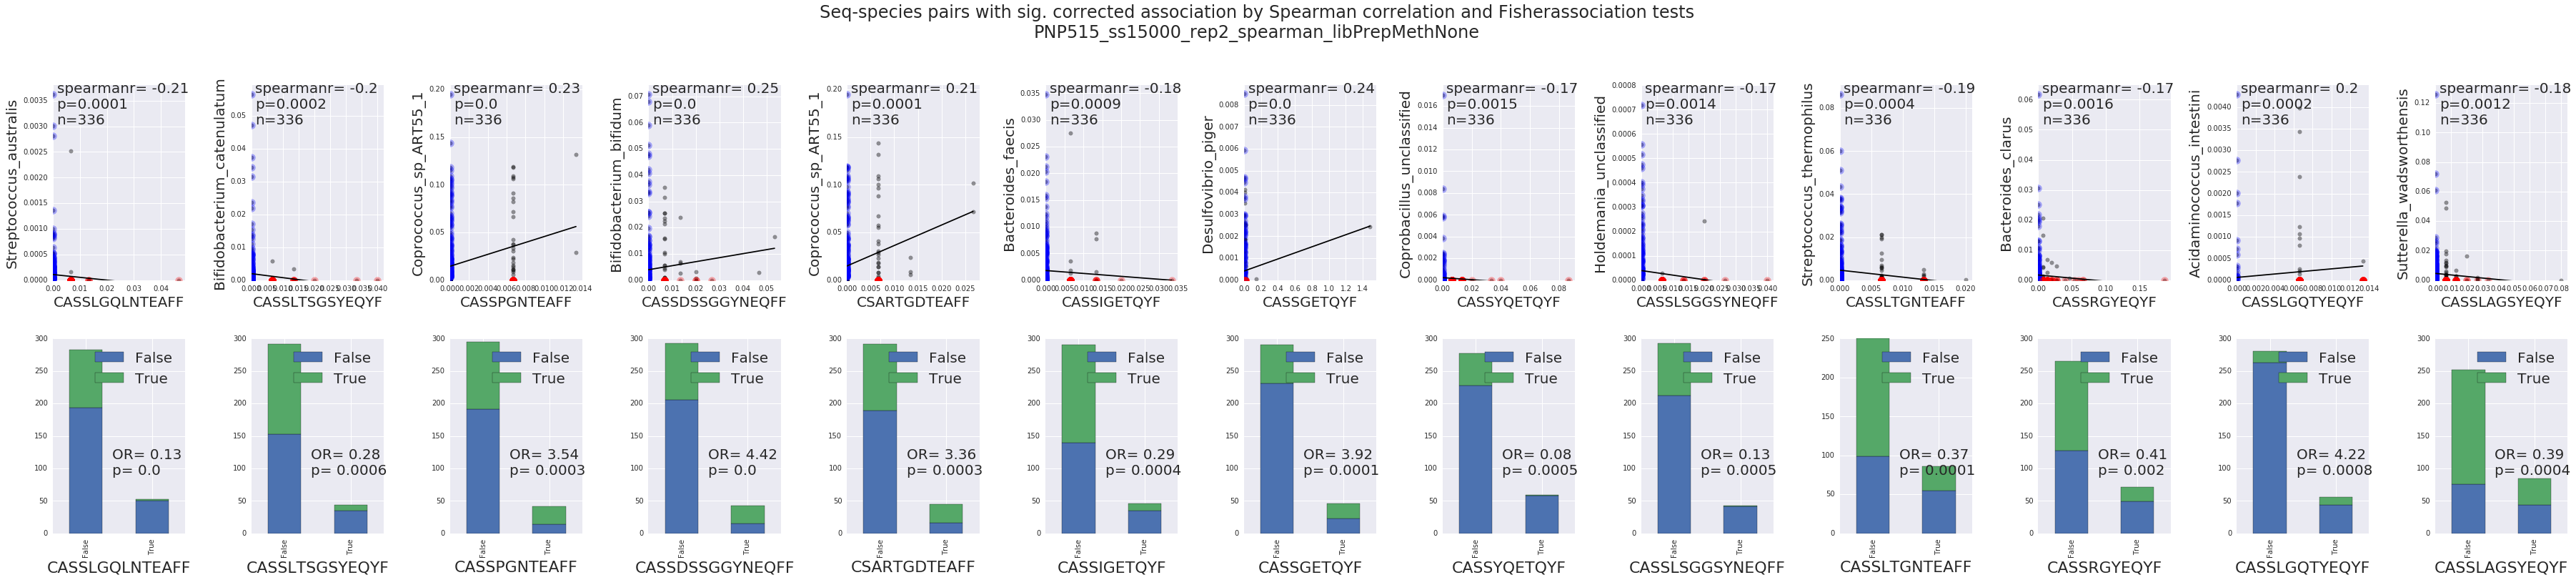

In [25]:
color_binary=True
corrTest='spearman'
outlierSTD=None
pairs=sigCorrectedBothPairs

hsize=4*len(pairs)
vsize=12

fig, axes=plt.subplots(nrows=2, ncols=len(pairs),figsize=(hsize,vsize))

for n,pair in enumerate(pairs):
        #plot correlation:
        ax1=axes[0,n]
        species=pair[0]
        seq=pair[1]
        print n,pair
        pairData=pd.merge(pd.DataFrame(TCRdf_RA[seq]),pd.DataFrame(MbDF_RA[species]),how='inner', left_index=True,right_index=True)
        
        x = pairData[seq]
        y = pairData[species]
        xy=pairData[[seq,species]]
        usedSamples=len(xy.dropna())
        if corrTest=='pearson':
            r, p = MyPearsonr(x, y)
        else:
            r, p = MySpearmanr(x, y)
        ax1.scatter(x, y, color='black', alpha=0.4,s=30)
        xmax = round(np.max(x) * 1.05, 4)
        ymax = round(np.max(y) * 1.05, 4)

        for ind in range(0, len(pairData)):
                xpoint = pairData[seq][ind]
                ypoint = pairData[species][ind]
                if color_binary:
                    if xpoint > 0 and ypoint == 0:
                        ax1.scatter(xpoint, ypoint, color='red', edgecolor='red', s=100, alpha=0.3)
                    if ypoint > 0 and xpoint == 0:
                        ax1.scatter(xpoint, ypoint, color='blue', edgecolor='blue', s=100, alpha=0.3)
        ax1.annotate('%sr= %s\np=%s\nn=%s' % (corrTest,round(r, 2), round(p, 4), usedSamples), xy=(0.03, 0.8), 
                    xycoords='axes fraction', fontsize=20)
        ax1.set_xlim(0, xmax)
        ax1.set_ylim(0, ymax)
        ax1.set_xlabel(seq,fontsize=20)
        ax1.set_ylabel(species,fontsize=20)
        plot_bestFitLine(x, y, ax1, color='black')
                        
                        
        #plot bar graphs:
        ax2=axes[1,n]
        tab = pd.crosstab(pairData[seq] > 0.0001,pairData[species] > 0)
        real_OR_fisher, real_p_fisher=fisher_exact(tab)
        tab.plot(kind='bar',stacked=True,ax=ax2)
        ax2.annotate('OR= %s\np= %s' % (round(real_OR_fisher, 2), round(real_p_fisher, 4)), xy=(0.45, 0.3), 
                    xycoords='axes fraction', fontsize=20)
        xlabel2=ax2.get_xlabel()
        ax2.set_xlabel(xlabel2,fontsize=22)
        ax2.legend(fontsize=20)
        


        
        
fig.subplots_adjust(left=0.05, bottom=None, right=0.99, top=0.85,
    wspace=0.5, hspace=0.3)
fig.suptitle('Seq-species pairs with sig. corrected association by Spearman correlation and Fisher\
association tests\n%s_%s_libPrepMeth%s' %(datasetName,corrTest,libPrepMethod),fontsize=24)

folderToSave='%s/TCR_mb_results/bestSeqSpeciesPairPlots' %datasetFolder
if not isdir(folderToSave):
    makedirs(folderToSave)
file1='%s/sigInBoth_corrScater&fisherBars_%s' %(folderToSave, cdate)
fig.savefig(file1,dpi=200)
plt.show()

#### plot pairs that I determine:

0 ('Lactobacillus_crispatus', 'CASSFGTEAFF')


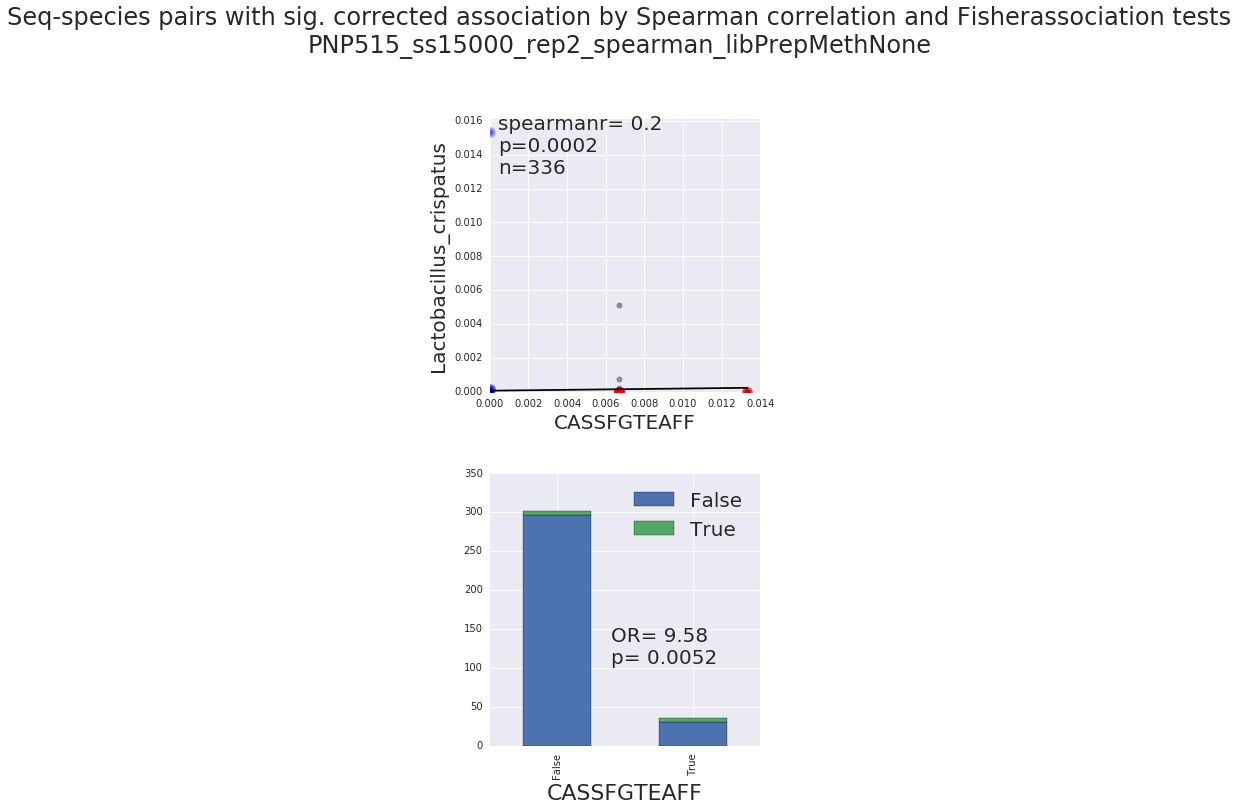

In [32]:
# celiac related pair:
pairs=[('Lactobacillus_crispatus','CASSFGTEAFF')]

hsize=4*len(pairs)
vsize=12

fig, axes=plt.subplots(nrows=2, ncols=len(pairs),figsize=(hsize,vsize))

for n,pair in enumerate(pairs):
        #plot correlation:
        if len(pairs)==1:
            ax1=axes[0]
        else:
            ax1=axes[0,n]
        species=pair[0]
        seq=pair[1]
        print n,pair
        pairData=pd.merge(pd.DataFrame(TCRdf_RA[seq]),pd.DataFrame(MbDF_RA[species]),how='inner', left_index=True,right_index=True)
        
        x = pairData[seq]
        y = pairData[species]
        xy=pairData[[seq,species]]
        usedSamples=len(xy.dropna())
        if corrTest=='pearson':
            r, p = MyPearsonr(x, y)
        else:
            r, p = MySpearmanr(x, y)
        ax1.scatter(x, y, color='black', alpha=0.4,s=30)
        xmax = round(np.max(x) * 1.05, 4)
        ymax = round(np.max(y) * 1.05, 4)

        for ind in range(0, len(pairData)):
                xpoint = pairData[seq][ind]
                ypoint = pairData[species][ind]
                if color_binary:
                    if xpoint > 0 and ypoint == 0:
                        ax1.scatter(xpoint, ypoint, color='red', edgecolor='red', s=100, alpha=0.3)
                    if ypoint > 0 and xpoint == 0:
                        ax1.scatter(xpoint, ypoint, color='blue', edgecolor='blue', s=100, alpha=0.3)
        ax1.annotate('%sr= %s\np=%s\nn=%s' % (corrTest,round(r, 2), round(p, 4), usedSamples), xy=(0.03, 0.8), 
                    xycoords='axes fraction', fontsize=20)
        ax1.set_xlim(0, xmax)
        ax1.set_ylim(0, ymax)
        ax1.set_xlabel(seq,fontsize=20)
        ax1.set_ylabel(species,fontsize=20)
        plot_bestFitLine(x, y, ax1, color='black')
                        
                        
        #plot bar graphs:
        if len(pairs)==1:
            ax2=axes[1]
        else:
            ax2=axes[1,n]
        tab = pd.crosstab(pairData[seq] > 0.0001,pairData[species] > 0)
        real_OR_fisher, real_p_fisher=fisher_exact(tab)
        tab.plot(kind='bar',stacked=True,ax=ax2)
        ax2.annotate('OR= %s\np= %s' % (round(real_OR_fisher, 2), round(real_p_fisher, 4)), xy=(0.45, 0.3), 
                    xycoords='axes fraction', fontsize=20)
        xlabel2=ax2.get_xlabel()
        ax2.set_xlabel(xlabel2,fontsize=22)
        ax2.legend(fontsize=20)
        


        
        
fig.subplots_adjust(left=0.05, bottom=None, right=0.99, top=0.85,
    wspace=0.5, hspace=0.3)
fig.suptitle('Seq-species pairs with sig. corrected association by Spearman correlation and Fisher\
association tests\n%s_%s_libPrepMeth%s' %(datasetName,corrTest,libPrepMethod),fontsize=24)

folderToSave='%s/TCR_mb_results/bestSeqSpeciesPairPlots' %datasetFolder
if not isdir(folderToSave):
    makedirs(folderToSave)
file1='%s/celiacPair_%s' %(folderToSave, cdate)
fig.savefig(file1,dpi=200)
plt.show()

#### plot corr scatter and fisher bars for sig pairs with identity:

In [ ]:
color_binary=True
corrTest='spearman'
outlierSTD=None

fig, axes=plt.subplots(nrows=2, ncols=6,figsize=(32,13))

for n,pair in enumerate(sigBothWithIdentityPairs):
        #plot correlation:
        ax1=axes[0,n]
        species=pair[0]
        seq=pair[1]
        print n,pair
        pairData=pd.merge(pd.DataFrame(TCRdf_RA[seq]),pd.DataFrame(MbDF_RA[species]),how='inner', left_index=True,right_index=True)
        
        x = pairData[seq]
        y = pairData[species]
        xy=pairData[[seq,species]]
        usedSamples=len(xy.dropna())
        if corrTest=='pearson':
            r, p = MyPearsonr(x, y)
        else:
            r, p = MySpearmanr(x, y)
        ax1.scatter(x, y, color='black', alpha=0.3)
        xmax = round(np.max(x) * 1.05, 4)
        ymax = round(np.max(y) * 1.05, 4)

        for ind in range(0, len(pairData)):
                xpoint = pairData[seq][ind]
                ypoint = pairData[species][ind]
                if color_binary:
                    if xpoint > 0 and ypoint == 0:
                        ax1.scatter(xpoint, ypoint, color='red', edgecolor='red', s=100, alpha=0.3)
                    if ypoint > 0 and xpoint == 0:
                        ax1.scatter(xpoint, ypoint, color='blue', edgecolor='blue', s=100, alpha=0.3)
        ax1.annotate('%sr= %s,p= %s\nn=%s' % (corrTest,round(r, 2), round(p, 6), usedSamples), xy=(0.05, 0.8), 
                    xycoords='axes fraction', fontsize=16)
        ax1.set_xlim(0, xmax)
        ax1.set_ylim(0, ymax)
        ax1.set_xlabel(seq,fontsize=18)
        ax1.set_ylabel(species,fontsize=18)
        plot_bestFitLine(x, y, ax1, color='black')
                        
                        
        #plot bar graphs:
        ax2=axes[1,n]
        tab = pd.crosstab(pairData[seq] > 0.0001,pairData[species] > 0)
        real_OR_fisher, real_p_fisher=fisher_exact(tab)
        tab.plot(kind='bar',stacked=True,ax=ax2,fontsize=16)
        ax2.annotate('OR= %s\np= %s' % (round(real_OR_fisher, 2), round(real_p_fisher, 6)), xy=(0.45, 0.3), 
                    xycoords='axes fraction', fontsize=16)
        


        
        
fig.subplots_adjust(left=0.05, bottom=None, right=0.99, top=0.85,
    wspace=0.5, hspace=0.3)
fig.suptitle('Seq-species pairs with sig. association and known identities\
association tests\n%s_%s_libPrepMeth%s' %(datasetName,corrTest,libPrepMethod),fontsize=24)

folderToSave='%s/TCR_mb_results/bestSeqSpeciesPairPlots' %datasetFolder
if not isdir(folderToSave):
    makedirs(folderToSave)
file1='%s/sigBothWithIdentityPairs_corrScater&fisherBars_%s' %(folderToSave, cdate)
fig.savefig(file1,dpi=200)
plt.show()